# Walk-forward Comparison (v1)
Compare:
- Trend strategy walk-forward results
- Mean reversion strategy walk-forward results


In [ ]:
# Lightweight imports for data handling and plotting
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Load walk-forward result summaries for both strategies. Each CSV is expected
# to have one row per test period with metrics such as Sharpe, total_return, and max_drawdown.
trend = pd.read_csv("../data/results/walkforward_results.csv")
mr = pd.read_csv("../data/results/walkforward_meanrev_results.csv")

# Show the key columns for quick inspection
trend[["test_year", "sharpe", "total_return", "max_drawdown"]], mr[["test_year", "sharpe", "total_return", "max_drawdown"]]


(   test_year    sharpe  total_return  max_drawdown
 0       2016  1.555299      0.078106     -0.028656
 1       2017  0.694590      0.032426     -0.027825
 2       2018  0.485665      0.051892     -0.068347
 3       2019  1.776077      0.182653     -0.072573
 4       2020  0.656678      0.121135     -0.161323
 5       2021  1.473896      0.160219     -0.042667
 6       2022 -0.371393     -0.043284     -0.109455
 7       2023  1.806307      0.181093     -0.063015
 8       2024  0.688714      0.058111     -0.065544
 9       2025 -0.150998     -0.009479     -0.070549,
    test_year    sharpe  total_return  max_drawdown
 0       2016  0.532827      0.037945     -0.078937
 1       2017  1.209932      0.024515     -0.016375
 2       2018  0.021836      0.002332     -0.069888
 3       2019  1.106758      0.051391     -0.028095
 4       2020  1.575200      0.225171     -0.097068
 5       2021  0.800764      0.058918     -0.038004
 6       2022 -0.562391     -0.074290     -0.132714
 7       20

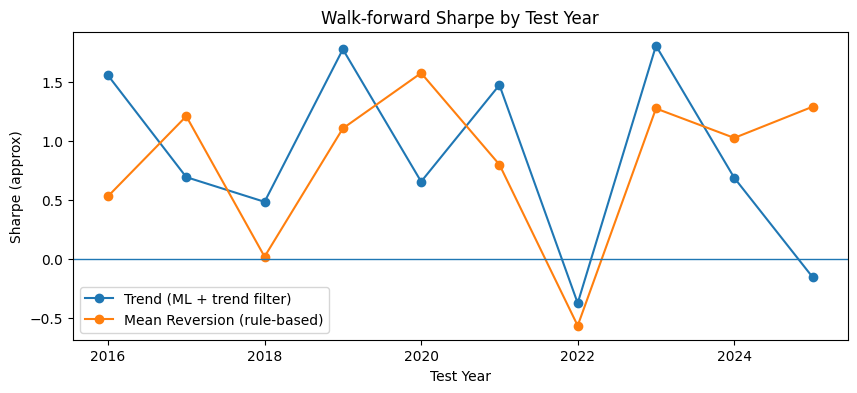

In [ ]:
# Plot walk-forward Sharpe for each test year to compare strategy consistency
plt.figure(figsize=(10, 4))
plt.plot(trend["test_year"], trend["sharpe"], marker="o", label="Trend (ML + trend filter)")
plt.plot(mr["test_year"], mr["sharpe"], marker="o", label="Mean Reversion (rule-based)")
plt.title("Walk-forward Sharpe by Test Year")
plt.xlabel("Test Year")
plt.ylabel("Sharpe (approx)")
plt.axhline(0, linewidth=1)
plt.legend()
plt.show()


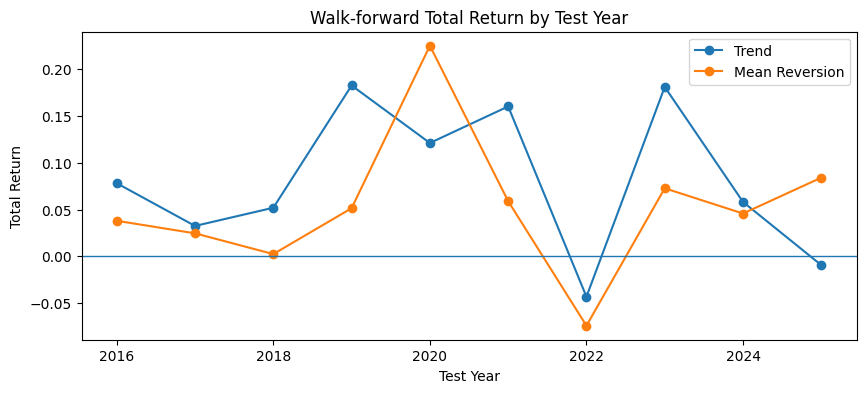

In [ ]:
# Compare total returns across test years for both strategies
plt.figure(figsize=(10, 4))
plt.plot(trend["test_year"], trend["total_return"], marker="o", label="Trend")
plt.plot(mr["test_year"], mr["total_return"], marker="o", label="Mean Reversion")
plt.title("Walk-forward Total Return by Test Year")
plt.xlabel("Test Year")
plt.ylabel("Total Return")
plt.axhline(0, linewidth=1)
plt.legend()
plt.show()


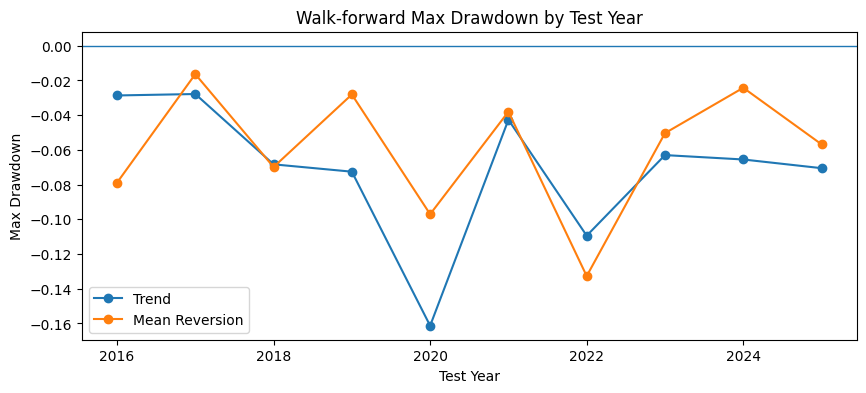

In [ ]:
# Compare maximum drawdown observed in each walk-forward test period
plt.figure(figsize=(10, 4))
plt.plot(trend["test_year"], trend["max_drawdown"], marker="o", label="Trend")
plt.plot(mr["test_year"], mr["max_drawdown"], marker="o", label="Mean Reversion")
plt.title("Walk-forward Max Drawdown by Test Year")
plt.xlabel("Test Year")
plt.ylabel("Max Drawdown")
plt.axhline(0, linewidth=1)
plt.legend()
plt.show()


In [ ]:
# Merge the two result tables on test year and compute which strategy had higher Sharpe
# The suffixes allow distinguishing columns from each dataframe after the merge
merged = trend.merge(mr, on="test_year", suffixes=("_trend", "_mr"))

# Create a small helper column `winner_sharpe` that indicates which strategy achieved
# the higher Sharpe in that test year (ties go to 'trend')
merged["winner_sharpe"] = merged.apply(
    lambda r: "trend" if r["sharpe_trend"] >= r["sharpe_mr"] else "mean_reversion",
    axis=1,
)

# Show a concise comparison table for each test year
merged[["test_year", "sharpe_trend", "sharpe_mr", "winner_sharpe"]]


,test_year,sharpe_trend,sharpe_mr,winner_sharpe
0,2016,1.555299,0.532827,trend
1,2017,0.694590,1.209932,mean_reversion
2,2018,0.485665,0.021836,trend
3,2019,1.776077,1.106758,trend
4,2020,0.656678,1.575200,mean_reversion
5,2021,1.473896,0.800764,trend
6,2022,-0.371393,-0.562391,trend
7,2023,1.806307,1.275333,trend
8,2024,0.688714,1.026253,mean_reversion
9,2025,-0.150998,1.290000,mean_reversion
